In [3]:
import glob
from tqdm import tqdm
import pickle
import os
import numpy as np
import jax
import bayes3d as b
import subprocess
paths = "/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/pickled_data/*pkl"
files = sorted(glob.glob(paths))
import sys
from genjax._src.core.pytree.utilities import *
from genjax.generative_functions.distributions import ExactDensity
import jax.tree_util as jtu
from genjax._src.core.transforms.incremental import NoChange, UnknownChange, Diff
import genjax
from tensorflow_probability.substrates import jax as tfp
sys.path.append("../")
from viz import *
from utils import *
from mcs_utils import *
console = genjax.pretty()
gt_bin = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [63]:
testing_files = files[50:]
# testing_files.remove(testing_files[5])
for file in tqdm(testing_files):
    scene_name = file.split("/")[-1][:-4]
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_{scene_name}.pkl", 'rb') as file:
        results = pickle.load(file)
    print(scene_name)
    display(display_video(results["viz"]))

  0%|          | 0/12 [00:00<?, ?it/s]

passive_physics_validation_spatio_temporal_continuity_0001_01


<IPython.core.display.HTML object>

  8%|▊         | 1/12 [00:05<01:03,  5.79s/it]

passive_physics_validation_spatio_temporal_continuity_0001_02


<IPython.core.display.HTML object>

 17%|█▋        | 2/12 [00:11<00:57,  5.77s/it]

passive_physics_validation_spatio_temporal_continuity_0001_03


<IPython.core.display.HTML object>

 25%|██▌       | 3/12 [00:17<00:51,  5.77s/it]

passive_physics_validation_spatio_temporal_continuity_0001_07


<IPython.core.display.HTML object>

 33%|███▎      | 4/12 [00:23<00:46,  5.78s/it]

passive_physics_validation_spatio_temporal_continuity_0001_08


<IPython.core.display.HTML object>

 42%|████▏     | 5/12 [00:28<00:40,  5.82s/it]

passive_physics_validation_spatio_temporal_continuity_0001_09


<IPython.core.display.HTML object>

 50%|█████     | 6/12 [00:34<00:34,  5.80s/it]

passive_physics_validation_spatio_temporal_continuity_0001_13


<IPython.core.display.HTML object>

 58%|█████▊    | 7/12 [00:40<00:28,  5.80s/it]

passive_physics_validation_spatio_temporal_continuity_0001_14


<IPython.core.display.HTML object>

 67%|██████▋   | 8/12 [00:46<00:23,  5.81s/it]

passive_physics_validation_spatio_temporal_continuity_0001_15


<IPython.core.display.HTML object>

 75%|███████▌  | 9/12 [00:52<00:17,  5.80s/it]

passive_physics_validation_spatio_temporal_continuity_0001_19


<IPython.core.display.HTML object>

 83%|████████▎ | 10/12 [00:57<00:11,  5.79s/it]

passive_physics_validation_spatio_temporal_continuity_0001_20


<IPython.core.display.HTML object>

 92%|█████████▏| 11/12 [01:03<00:05,  5.76s/it]

passive_physics_validation_spatio_temporal_continuity_0001_21


<IPython.core.display.HTML object>

100%|██████████| 12/12 [01:09<00:00,  5.78s/it]


In [ ]:
def load_path(scene_name):
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_{scene_name}.pkl", 'rb') as file:
        return pickle.load(file)

In [58]:
with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_passive_physics_validation_object_permanence_0001_01.pkl", 'rb') as file:
    results = pickle.load(file)
display_video(results["viz"])

<IPython.core.display.HTML object>

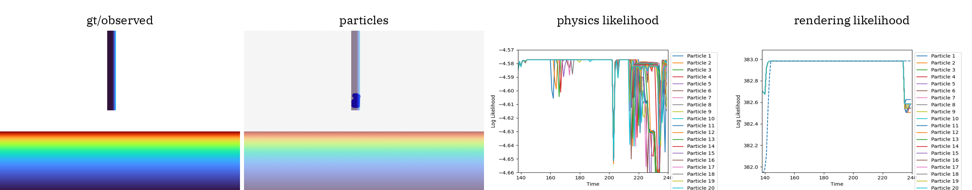

In [61]:
results['viz'][-1]

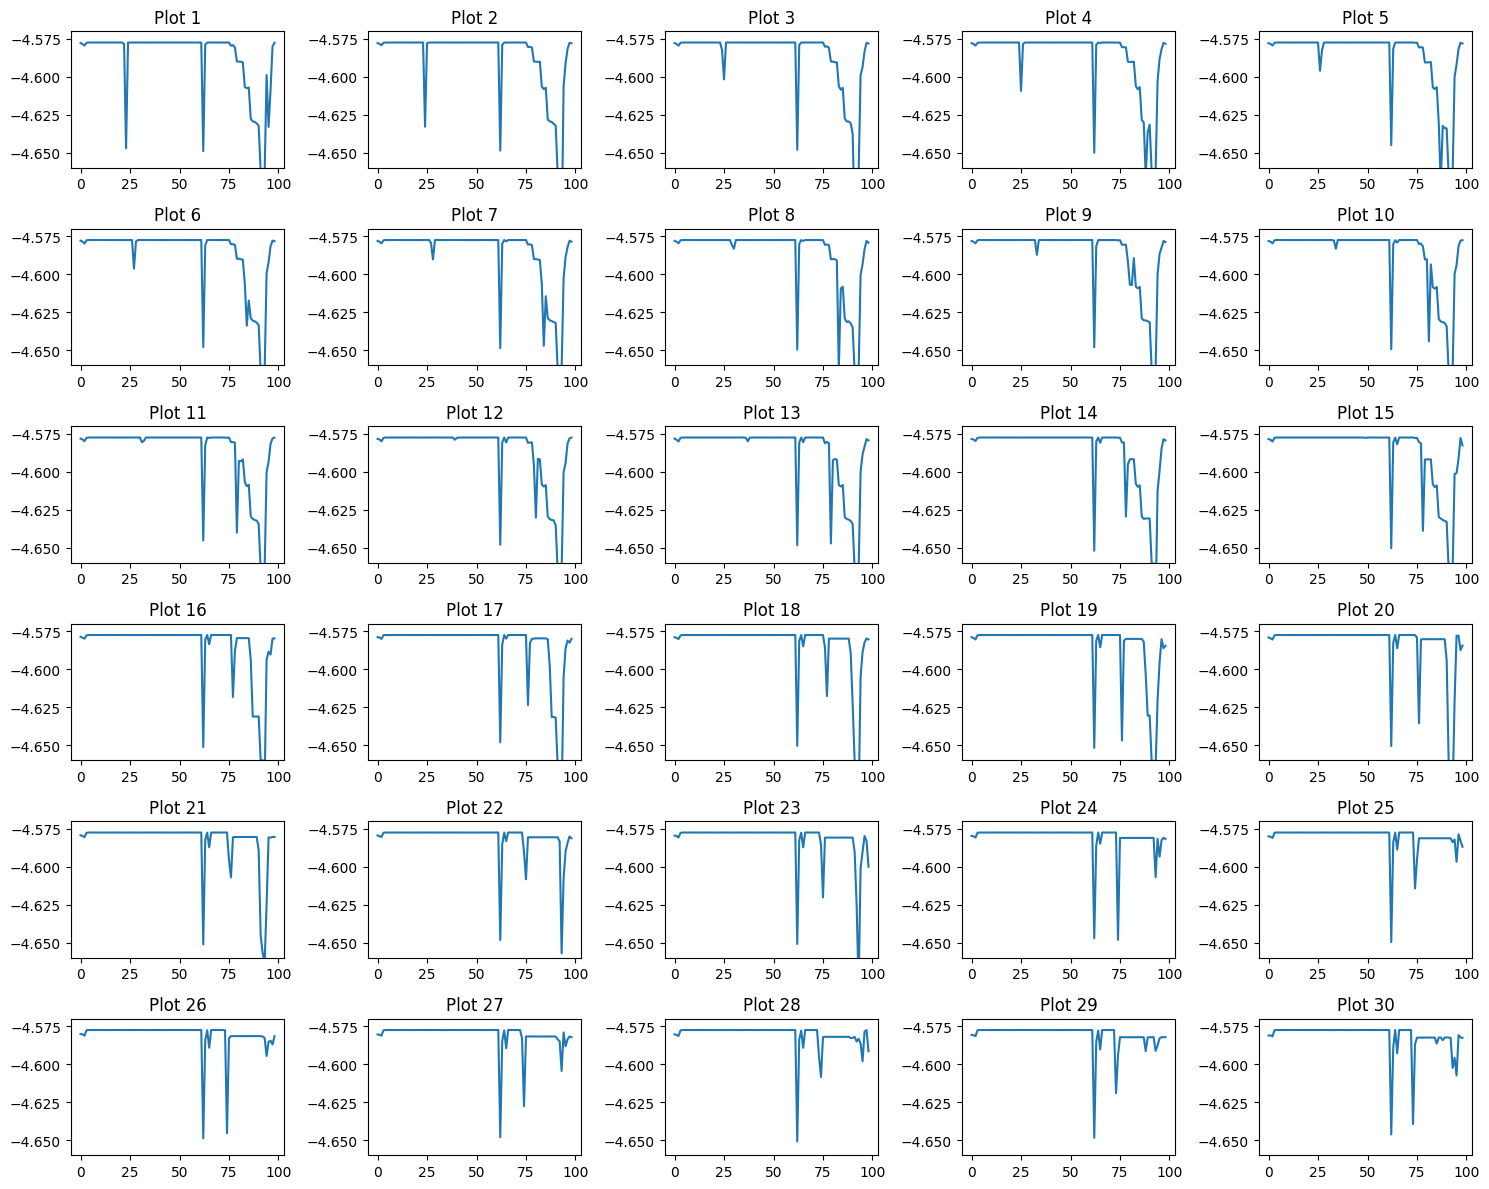

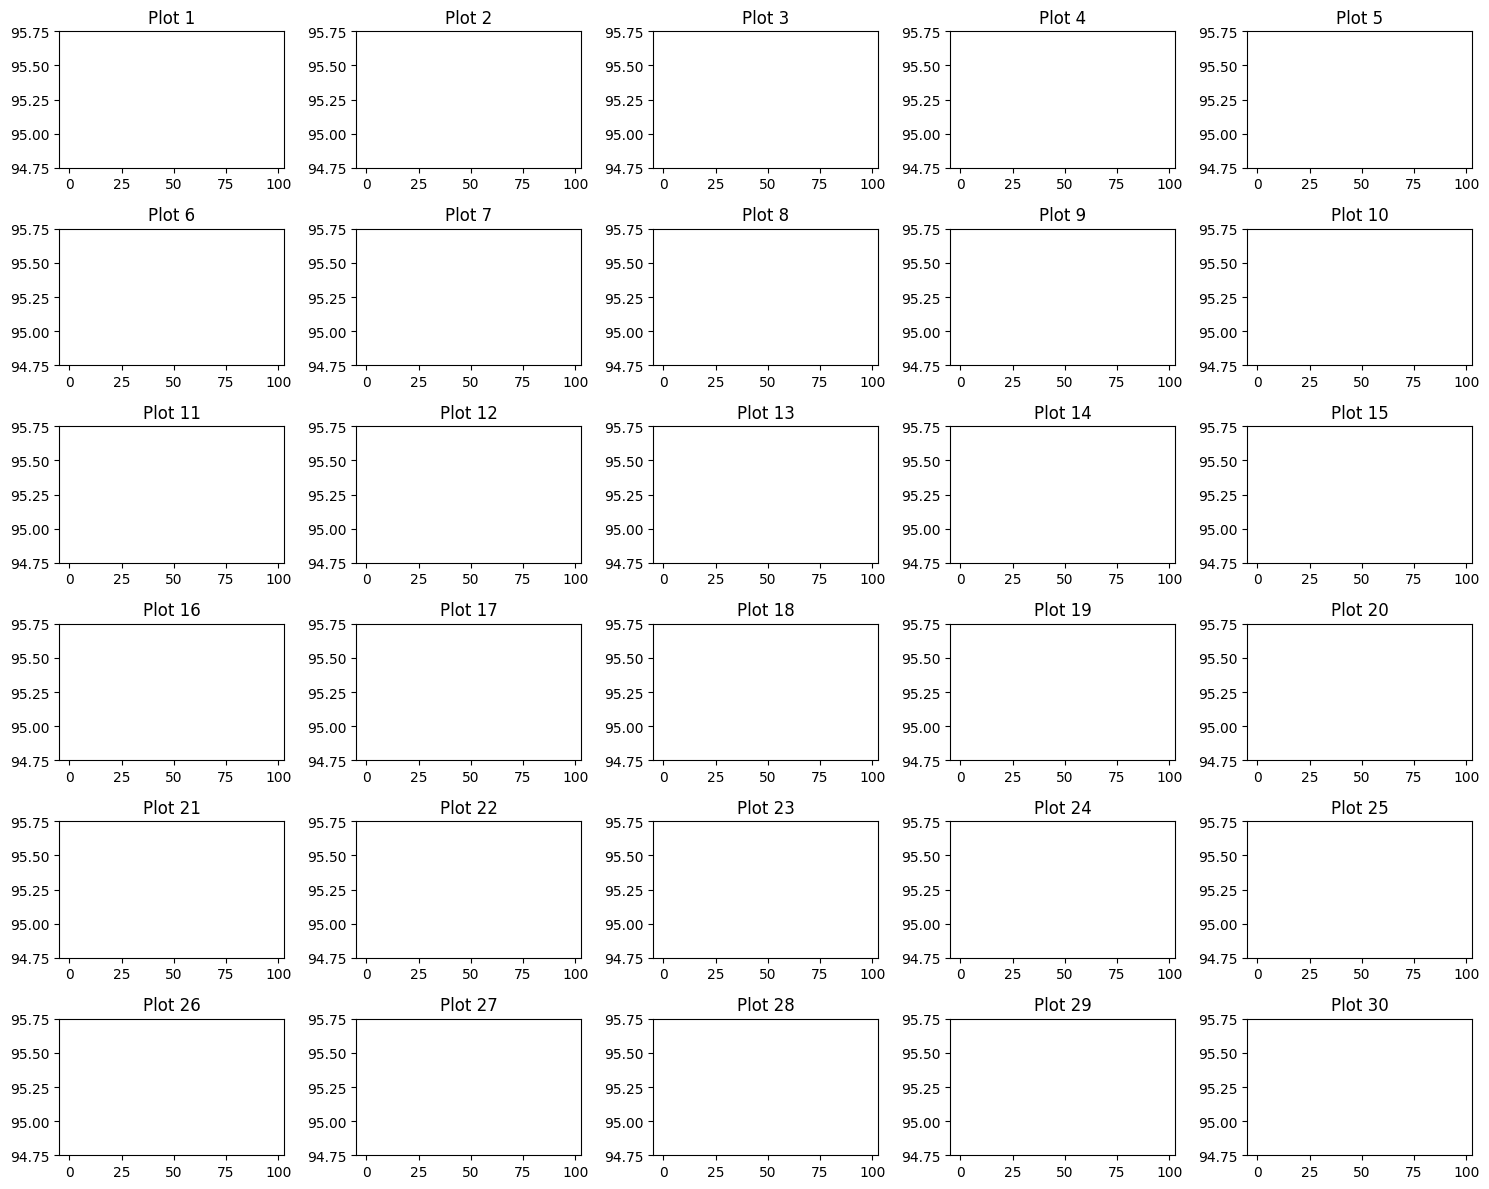

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: this is code used to check if resampling happened
n_particles = results['resampled_indices'].shape[1]
jnp.all(results['resampled_indices'] == np.arange(n_particles), axis = 1)

base_indices = np.arange(n_particles)
for i in range(results['resampled_indices'].shape[0]):
    base_indices = base_indices[results['resampled_indices'][i]]

# scene = implausible_perm_results[3]
scene = results# implausible_perm_results[3]

# worst_rent = scene[""]

data = scene["phy_ll"][0][3:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[3:, base_indices[i]])
    ax.set_ylim([-4.66, -4.57])  # Set the same y-axis limits for all plots
    ax.set_title(f"Plot {i+1}")
    # ax.set_yscale("log")

plt.tight_layout()
plt.show()


data = scene["rend_ll"][3:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[3:, base_indices[i]])
    ax.set_ylim([94.75, 95.75])  # Set the same y-axis limits for all plots
    ax.set_title(f"Plot {i+1}")
    # ax.set_yscale("log")

plt.tight_layout()
plt.show()

In [ ]:
# TODO: this is code used to check if resampling happened
n_particles = results['resampled_indices'].shape[1]
resampled_bool = jnp.all(results['resampled_indices'] == np.arange(n_particles), axis = 1)

base_indices = np.arange(n_particles)
for i in range(results['resampled_indices'].shape[0]):
    base_indices = base_indices[results['resampled_indices'][i]]

In [ ]:
resampled_bool

In [2]:
def load_path(scene_name):
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_{scene_name}.pkl", 'rb') as file:
        return pickle.load(file)

plausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 1]
implausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 0]

plausible_scenes_perm = [x for x in plausible_scenes if "permanence" in x]
implausible_scenes_perm = [x for x in implausible_scenes if "permanence" in x]

plausible_scenes_perm = [x for x in plausible_scenes_perm if "09" not in x]
implausible_scenes_perm = [x for x in implausible_scenes_perm if "09" not in x]

plausible_scenes_perm = [x for x in plausible_scenes_perm if "27" not in x]
implausible_scenes_perm = [x for x in implausible_scenes_perm if "27" not in x]

plausible_perm_results = [load_path(x) for x in plausible_scenes_perm]
implausible_perm_results = [load_path(x) for x in implausible_scenes_perm]

In [1]:
os

NameError: name 'os' is not defined

In [ ]:
plausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in plausible_perm_results]
implausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_rend_markers

In [ ]:
implausible_rend_markers

In [ ]:
plausible_phy_markers = [np.min(np.median(x["phy_ll"][0][3:,:],axis=1)) for x in plausible_perm_results]
implausible_phy_markers = [np.min(np.median(x["phy_ll"][0][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_phy_markers, plausible_scenes_perm

In [ ]:
implausible_phy_markers, implausible_scenes_perm

In [ ]:
# Create a scatter plot for the first cluster (in blue)
plt.scatter(plausible_phy_markers, plausible_rend_markers, c='blue', label='Plausible')

# Create a scatter plot for the second cluster (in red)
plt.scatter(implausible_phy_markers, implausible_rend_markers, c='red', label='Implausible')

# Add labels and a title
plt.xlabel('Physics LL')
plt.ylabel('Rend LL')
plt.title('Cluster Plot')

# Add a legend to distinguish between clusters
plt.legend()

# Display the plot
plt.show()

In [ ]:
implausible_scenes_perm

In [ ]:
params = (jnp.array([1e-0,1e-0,5e-1]), 5e-1)
# params = (1e+20, 0)
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0,0,0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.005,0.0,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,1,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,0.0,1]), *params))
# 0.02 ll diff for movement of away

In [ ]:
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([1,0,0]), *(5e-0,5e-1)))

In [ ]:
params = [1,1,1]
display(genjax.tfp_mv_normal_diag.logpdf([0,0,0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.1,0.1,0.0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.0,0.1,0.1],[0,0,0],params))


In [ ]:
qs = jnp.linspace(0.05,0.95,30)
tfp.distributions.Normal(0.02,0.05).quantile(qs)

In [ ]:
display(9600*jax.scipy.stats.norm.pdf(
        np.array([0.]),
        loc=0.0, 
        scale=0.1
    ) * 0.01)

9600*jax.scipy.stats.norm.pdf(
        np.array([0.0001]),
        loc=0.0, 
        scale=0.1
    ) * 0.01



In [ ]:
3.9894223 * (2400-6) *0.01
